In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib.dates as mdates

In [3]:
import importlib

In [4]:
import sh_ssw_methods as ssw

In [5]:
import numpy as np
import pandas as pd

In [6]:
from config import params

- identify events

In [7]:
event_dates_all, defn_all = [], []

In [8]:
# zeof1_lim
ze_lv50 = ssw.zeof1_lim(**params["zeof1_lim_lv50"])
ze_lv10 = ssw.zeof1_lim(**params["zeof1_lim_lv10"])
ze_lv1  = ssw.zeof1_lim(**params["zeof1_lim_lv1"])
event_dates_all += [ze_lv50, ze_lv10, ze_lv1]
defn_all += ["zeof1_lim_lv50","zeof1_lim_lv10","zeof1_lim_lv1"]

Saved 28 events to EOF1.Z50.gt1.0.csv
Saved 29 events to EOF1.Z10.gt1.0.csv
Saved 29 events to EOF1.Z1.gt1.0.csv


In [9]:
# ozone_butler
o3 = ssw.ozone_butler(**params["ozone_butler"])
event_dates_all.append(o3); defn_all.append("ozone_butler")

sh_ssw_totcol_o3_40DU.csv saved.


In [10]:
# uanom karpechko
ua10 = ssw.u_anom_karpechko(**params["u_anom_karpechko_10"])
ua50 = ssw.u_anom_karpechko(**params["u_anom_karpechko_50"])
event_dates_all += [ua10, ua50]; defn_all += ["u_anom_karpechko_10","u_anom_karpechko_50"]

['1982-10-21' '1986-09-06' '1988-08-30' '1988-09-25' '1990-09-28'
 '2000-10-18' '2002-08-22' '2004-09-28' '2007-09-19' '2008-08-05'
 '2009-07-23' '2012-08-20' '2012-10-08' '2013-09-19' '2017-09-20'
 '2019-09-01']
16 3.8095238095238093 42.0
['1979-10-22' '1980-07-28' '1981-07-28' '1982-10-07' '1985-06-12'
 '1988-09-25' '1994-05-30' '1995-07-14' '1996-09-13' '1999-06-16'
 '2000-10-27' '2002-09-02' '2003-10-31' '2004-10-15' '2005-10-08'
 '2007-07-05' '2008-08-04' '2012-10-09' '2013-10-02' '2013-10-30'
 '2014-10-10' '2016-10-18' '2017-10-26' '2019-09-13']
24 5.7142857142857135 42.0


In [11]:
# utend kaprechko
ut10 = ssw.u_tend_karpechko(**params["u_tend_karpechko_10"])
ut50 = ssw.u_tend_karpechko(**params["u_tend_karpechko_50"])
event_dates_all += [ut10, ut50]; defn_all += ["u_tend_karpechko_10","u_tend_karpechko_50"]

['1980-10-03' '1982-10-02' '1983-10-26' '1984-09-29' '1990-09-22'
 '1992-09-25' '1993-10-18' '1997-10-29' '2000-09-30' '2002-08-17'
 '2003-09-29' '2004-09-12' '2005-10-07' '2006-10-15' '2007-09-13'
 '2008-10-07' '2009-09-27' '2012-10-04' '2013-10-15' '2014-10-09'
 '2017-09-07' '2019-09-01']
22 5.238095238095238 42.0
['1982-10-01' '1983-10-31' '1984-10-29' '1985-10-29' '1988-10-21'
 '1992-09-26' '1992-10-22' '1993-10-17' '1995-10-07' '1997-10-29'
 '1999-10-30' '2002-09-17' '2002-10-29' '2003-10-25' '2004-10-08'
 '2005-10-05' '2009-10-08' '2011-10-30' '2014-10-04' '2014-10-27'
 '2016-09-27' '2017-09-08' '2017-10-29']
23 5.476190476190476 42.0


In [12]:
# polarT Shen
pt = ssw.polarT_shen(**params["polarT_shen"])
event_dates_all.append(pt); defn_all.append("polarT_shen")

ShenEtAl2022_org_Tgrad_1979_2021_era5.txt saved.


In [13]:
# EPflux Reichler
epf, dat = ssw.epflux_reichler(**params["epflux_reichler"])
event_dates_all.append(epf); defn_all.append("epflux_reichler")

FZ100_SH_ERA5_tau60_sfz36.csv saved.


In [14]:
# udecel Wu
ud10, drops = ssw.u_decel_wu(**params["u_decel_wu_10"])
event_dates_all.append(ud10); defn_all.append("u_decel_wu_10")

u10_60S_decel_events.csv saved.


In [15]:
# # stmi Lim
# stmi_years = ssw.stmi_lim(**params["stmi_lim"])
# event_dates_all.append(stmi_years); defn_all.append("stmi_lim")

- some statistics and some plots

In [16]:
def avg_events_per_decade(event_dates, clim_range):
    """
    Average number of events per decade, given a climatological range.
    """
    start = pd.to_datetime(clim_range[0]).year
    end   = pd.to_datetime(clim_range[1]).year
    n_years = end - start + 1
    
    n_events = len(event_dates)
    return (n_events / n_years) * 10.0

In [17]:
def to_datetime_index(arr):
    """Best-effort conversion to a 1D pandas.DatetimeIndex."""
    # If a method returned a tuple (e.g., (events, meta)), take the first piece
    if isinstance(arr, tuple):
        arr = arr[0]

    # xarray DataArray -> .values (but don't require xarray import)
    if hasattr(arr, "values"):
        arr = arr.values

    # Convert to 1D numpy array
    arr = np.asarray(arr).ravel()

    # If already datetime64, let pandas handle it; else attempt parse
    return pd.to_datetime(arr)

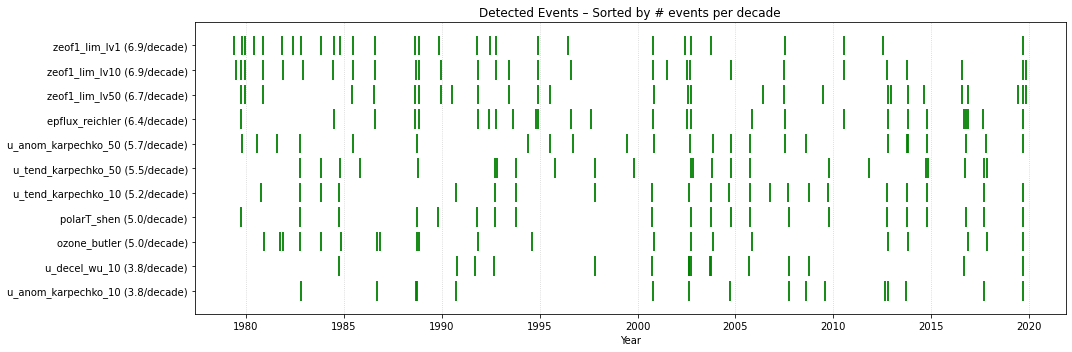

In [18]:
def plot_events_sorted(event_dates_all, defn_all, clim_range):
    # --- compute averages ---
    stats = []
    for label, dates in zip(defn_all, event_dates_all):
        avg_dec = avg_events_per_decade(dates, clim_range)
        stats.append((label, dates, avg_dec))

    # --- sort descending by avg events per decade ---
    stats_sorted = sorted(stats, key=lambda x: x[2], reverse=False)

    # --- plot ---
    fig, ax = plt.subplots(figsize=(15, 5))
    yticks, ylabels = [], []

    for ypos, (label, dates, avg_dec) in enumerate(stats_sorted, start=1):
        ax.vlines(dates, ypos - 0.4, ypos + 0.4, color='green', linewidth=2, alpha=0.9)
        yticks.append(ypos)
        ylabels.append(f"{label} ({avg_dec:.1f}/decade)")

    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)

    # x-axis: years
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlabel("Year")
    ax.set_title("Detected Events – Sorted by # events per decade")
    ax.grid(True, axis="x", linestyle=":", alpha=0.6)

    plt.tight_layout()
    plt.show()


# Example usage
clim_range = ['1979-01-01','2020-12-31']
plot_events_sorted(event_dates_all, defn_all, clim_range)
